# Load Dataset 

In [11]:
import nltk
import pandas as pd

nasa_df = pd.read_csv('C:/Users/Pixy/NYCDSA/Proj2_Webscraping/nasa_clean/nasa2008_17.csv')

In [12]:
nasa_df.shape


(16238, 16)

In [13]:
nasa_df.dtypes

abstract         object
agency           object
award_notice     object
city             object
cong_dist       float64
country          object
fy               object
fy_tot_cost       int64
organization     object
proj_end         object
proj_lead        object
proj_num         object
proj_start       object
proj_terms       object
state            object
title            object
dtype: object

In [14]:
nasa_df.sample(10)

,abstract,agency,award_notice,city,cong_dist,country,fy,fy_tot_cost,organization,proj_end,proj_lead,proj_num,proj_start,proj_terms,state,title
9936,SUBOPTIMAL WEIGHTING OF THE INFORMATION PROVID...,NASA,2013-05-20T00:00:00Z,PORTLAND,3.0,UNITED STATES,2013-01-01,82516,PORTLAND STATE UNIVERSITY,2016-07-25T00:00:00Z,"DAESCU, DACIAN",NNX13AN94G,2013-07-26T00:00:00Z,Assimilations; Data; Measurement; Modeling; Pe...,OR,SUBOPTIMAL WEIGHTING OF THE INFORMATION PROVID...
5257,The objective of the proposed work is to assis...,NASA,2010-08-26T00:00:00Z,BALTIMORE,7.0,UNITED STATES,2010-01-01,116500,THE JOHNS HOPKINS UNIVERSITY,2013-10-20T00:00:00Z,"BLEWETT, DAVID",NNX10AR57G,2010-11-20T00:00:00Z,Archives; Calibration; Data Analyses; Science;...,MD,THE OBJECTIVE OF THE PROPOSED WORK IS TO ASSIS...
11235,PI WILL BE RESPONSIBLE TO COORDINATE ALL THE W...,NASA,2014-08-20T00:00:00Z,ORONO,2.0,UNITED STATES,2014-01-01,199972,UNIVERSITY OF MAINE ORONO,2017-08-17T00:00:00Z,"BOSS, EMMANUEL",NNX14AP49G,2014-08-18T00:00:00Z,Calibration; Manufacturer Name; Preparation; s...,ME,PI WILL BE RESPONSIBLE TO COORDINATE ALL THE W...
15903,THE MIT INNOVATION LAB IS AN MIT-INDUSTRY COLL...,NASA,2016-10-20T00:00:00Z,CAMBRIDGE,7.0,UNITED STATES,2017-01-01,60000,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,2018-10-13T00:00:00Z,"HIPPEL, ERIC V",NNX17AB13G,2016-10-14T00:00:00Z,improved; Industry Collaboration; innovation; ...,MA,THE MIT INNOVATION LAB IS AN MIT-INDUSTRY COLL...
6202,We propose to continue the NASA Planetary Biol...,NASA,2010-10-20T00:00:00Z,WOODS HOLE,10.0,UNITED STATES,2010-01-01,129802,MARINE BIOLOGICAL LABORATORY,2013-08-31T00:00:00Z,"MARGULIS, LYNN",NNX10AR25G,2010-01-20T00:00:00Z,Biology; graduate student; Internships; Labora...,MA,WE PROPOSE TO CONTINUE THE NASA PLANETARY BIOL...
6533,SUMMER WITH MY SISTERS STEM ACADEMY \n\nNASA'S...,NASA,2011-06-16T00:00:00Z,GREENSBORO,12.0,UNITED STATES,2011-01-01,9487,NORTH CAROLINA AGRICULTURAL AND TECHNICAL STAT...,2011-01-20T00:00:00Z,"KABADI, VINAYAK",NNX11AJ20G,2011-01-20T00:00:00Z,Academy; experience; high school; Institution;...,NC,SUMMER WITH MY SISTERS STEM ACADEMY \N\NNASA''...
10348,THE ONSET OF MAGNETOSPHERIC SUBSTORM IS AN EXP...,NASA,2013-04-23T00:00:00Z,BERKELEY,9.0,UNITED STATES,2013-01-01,136238,UNIVERSITY OF CALIFORNIA BERKELEY,2014-02-20T00:00:00Z,"LIN, NAIGUO",NNX13AI97G,2013-03-20T00:00:00Z,Environmental Wind; Magnetism,CA,THE ONSET OF MAGNETOSPHERIC SUBSTORM IS AN EXP...
16146,IT''S ELEMENTARY: CHEMICAL COMPOSITIONS AND CH...,NASA,2016-11-25T00:00:00Z,WASHINGTON,0.0,UNITED STATES,2017-01-01,116454,ASSOCIATION OF UNIVERSITIES FOR RESEARCH IN AS...,2019-11-09T00:00:00Z,"SMITH, VERNE",NNX17AB64G,2016-11-10T00:00:00Z,Chemicals; Goals; Names,DC,IT''S ELEMENTARY: CHEMICAL COMPOSITIONS AND CH...
9054,WE PROPOSE XMM-EPIC OBSERVATIONS OF 3 CLUSTERS...,NASA,NaN,BOULDER,2.0,UNITED STATES,2012-01-01,59631,UNIVERSITY OF COLORADO AT BOULDER,2012-01-20T00:00:00Z,"ELLINGSON, ERICA",NNX12AC33G,2011-02-20T00:00:00Z,Evolution; Galaxy; Roentgen Rays; Surveys,CO,WE PROPOSE XMM-EPIC OBSERVATIONS OF 3 CLUSTERS...
3561,"UNIVERSITY OF CALIFORNIA, IRVINE APPLICATIONS ...",NASA,2009-07-21T00:00:00Z,IRVINE,48.0,UNITED STATES,2009-01-01,60000,UNIVERSITY OF CALIFORNIA IRVINE,2011-08-31T00:00:00Z,"FAMIGLIETTI, JAMES",NNX09AN88H,2009-01-20T00:00:00Z,California; Data; Data Storage and Retrieval; ...,CA,"UNIVERSITY OF CALIFORNIA, IRVINE APPLICATIONS ..."


## Preprocessing of Abstract and Terms

- Convert all the text to lowercase - avoids having multiple copies of the same words.
- Replace all empty spaces with just one.

In [16]:
import re

# Convert all the strings to lower case
nasa_df['abstract'] = nasa_df['abstract'].str.lower()
nasa_df['proj_terms'] = nasa_df['proj_terms'].str.lower()
# \s+ means all empty space (\n, \r, \t)
nasa_df['abstract'] = nasa_df['abstract'].apply(lambda x: re.sub('\s+', ' ', x))
nasa_df['proj_terms'] = nasa_df['proj_terms'].apply(lambda x: re.sub('\s+', ' ', x))


In [17]:
nasa_df.sample(10)

,abstract,agency,award_notice,city,cong_dist,country,fy,fy_tot_cost,organization,proj_end,proj_lead,proj_num,proj_start,proj_terms,state,title
9621,the set of comets observed by solar heliospher...,NASA,2013-10-20T00:00:00Z,FLAGSTAFF,1.0,UNITED STATES,2013-01-01,61000,LOWELL OBSERVATORY,2016-08-15T00:00:00Z,"KNIGHT, MATTHEW",NNX13AQ86G,2013-08-16T00:00:00Z,archives; data; databases; dependence; dust; e...,AZ,THE SET OF COMETS OBSERVED BY SOLAR HELIOSPHER...
8822,gravity data for ocean circulation and climate...,NASA,NaN,CAMBRIDGE,8.0,UNITED STATES,2012-01-01,250000,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,2016-05-24T00:00:00Z,"WUNSCH, CARL",NNX12AJ93G,2012-05-25T00:00:00Z,blood circulation; climate; data; force of gra...,MA,GRAVITY DATA FOR OCEAN CIRCULATION AND CLIMATE...
10828,propose to work with nasa ames to identity org...,NASA,2013-06-20T00:00:00Z,RENO,2.0,UNITED STATES,2013-01-01,61676,NEVADA SYSTEM OF HIGHER EDUCATION,2015-11-20T00:00:00Z,"SUN, HENRY",NNX13AH27A,2013-12-20T00:00:00Z,base; biological markers; experience; future; ...,NV,PROPOSE TO WORK WITH NASA AMES TO IDENTITY ORG...
10951,soutli dalcota nasa epscor researcii infrastru...,NASA,2015-01-20T00:00:00Z,RAPID CITY,0.0,UNITED STATES,2015-01-01,125000,SOUTH DAKOTA SCHOOL OF MINES AND TECHNOLOGY,2018-09-30T00:00:00Z,"AGA, KARMEN",NNX15AK54A,2015-01-20T00:00:00Z,goals; infrastructure development; programs; r...,SD,SOUTLI DALCOTA NASA EPSCOR RESEARCII INFRASTRU...
2046,"chemistry in the outer solar system: jupiter, ...",NASA,2008-01-14T00:00:00Z,COLUMBIA,7.0,UNITED STATES,2008-01-01,126805,UNIVERSITIES SPACE RESEARCH ASSOCIATION,2011-05-26T00:00:00Z,"MOSES, JULIANNE",NNX08AF05G,2008-12-20T00:00:00Z,chemistry; jupiter; modeling; neptune; photoch...,MD,"CHEMISTRY IN THE OUTER SOLAR SYSTEM: JUPITER, ..."
7311,hampton university (hu) will partner with scie...,NASA,2011-09-26T00:00:00Z,HAMPTON,3.0,UNITED STATES,2011-01-01,202718,HAMPTON UNIVERSITY,2014-01-20T00:00:00Z,"ROBINSON, DIANNE",NNX11AP06A,2011-01-20T00:00:00Z,ccl20 gene; nebraska; programs; science; scien...,VA,HAMPTON UNIVERSITY (HU) WILL PARTNER WITH SCIE...
12251,the proposed three-day twsc decadal survey wor...,NASA,2015-04-30T00:00:00Z,SEATTLE,7.0,UNITED STATES,2015-01-01,93437,UNIVERSITY OF WASHINGTON,2016-12-20T00:00:00Z,"HOSSAIN, FAISAL",NNX15AI45G,2015-04-13T00:00:00Z,communities; educational workshop; mind-body m...,WA,THE PROPOSED THREE-DAY TWSC DECADAL SURVEY WOR...
10984,vincent g. ambrosia's tasks will entail overal...,NASA,2015-04-20T00:00:00Z,SEASIDE,20.0,UNITED STATES,2015-01-01,25000,CALIFORNIA STATE UNIVERSITY MONTEREY BAY,2017-08-18T00:00:00Z,"AMBROSIA, VINCENT G",NNX15AU10G,2015-08-19T00:00:00Z,ambrosia; award; consult; member; supervision;...,CA,VINCENT G. AMBROSIA'S TASKS WILL ENTAIL OVERAL...
3803,definitive tests of competing models of corona...,NASA,2008-11-17T00:00:00Z,CAMBRIDGE,8.0,UNITED STATES,2009-01-01,408556,SMITHSONIAN ASTROPHYSICAL OBSERVATORY,2012-02-28T00:00:00Z,"CRAMMER, STEVEN",NNX09AB27G,2009-01-20T00:00:00Z,acceleration; environmental wind; goals; heati...,MA,DEFINITIVE TESTS OF COMPETING MODELS OF CORONA...
1811,allen zych/university of california analysis o...,NASA,2008-04-17T00:00:00Z,RIVERSIDE,44.0,UNITED STATES,2008-01-01,696265,UNIVERSITY OF CALIFORNIA RIVERSIDE,2011-03-20T00:00:00Z,"ZYCH, ALLEN",NNX08AJ83G,2008-04-20T00:00:00Z,california; data; gamma rays; instrument; prot...,CA,ALLEN ZYCH/UNIVERSITY OF CALIFORNIA ANALYSIS O...


# Text Processing

In [18]:
# remove punctuation from Abstract and Proj_Terms
nasa_df['abstract'] = nasa_df['abstract'].apply(lambda x: re.sub('[^\w\s]', '', x))
nasa_df['proj_terms'] = nasa_df['proj_terms'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [89]:
# import stopwords and remove from training data
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [94]:
# domain specific words added to stopwords
add_stp = ['nasa', 'data', 'study', 'propose', 'research', 'system', 
           'provide', 'support', 'observations', 'national', 'united', 'states',
           'administration', 'university', 'universities', 'funding', 'measurements',
           'program', 'observation', 'analysis', 'analysi', 'model', 'using', 
           'use', 'measurement', 'project', 'new', 'development', 'mission', 'proposal']
stop = stop + add_stp 
# print(stop)

In [95]:
nasa_df['abstract'] = nasa_df['abstract'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nasa_df['proj_terms'] = nasa_df['proj_terms'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Word Cloud

In [22]:
from wordcloud import WordCloud

In [96]:
wc = WordCloud(background_color = 'white', max_words=2000, width=800, height=400)
# generate word cloud
# wc.generate(' '.join(nasa_df['proj_terms']))
wc.generate(' '.join(nasa_df['abstract']))

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

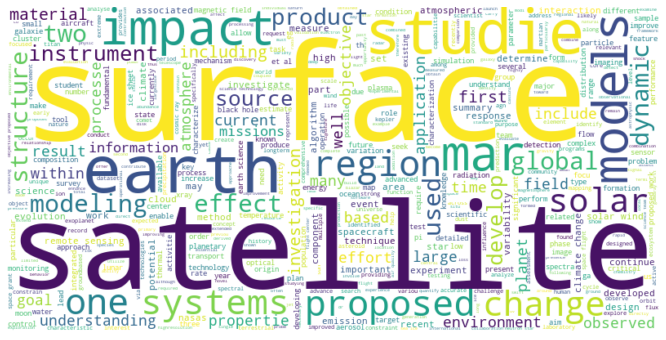

In [97]:
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()